# Visualización de datos utilizando matplotlib parte 3

In [1]:
# Importación de paquetes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### * [Visualización de regresión lineal](#Cap1)
### * [Visualización de distribuciones univariantes](#Cap2)
### * [Visualización de distribuciones multivariantes](#Cap3)

## Visualización de regresión lineal <a class="anchor" id="Cap1"></a>

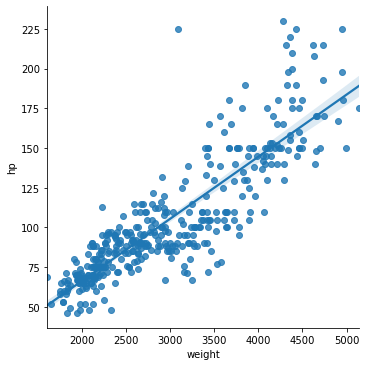

In [2]:
df = pd.read_csv("Automobile per gallon.csv", index_col=0)  # Importar conjuntos de datos


sns.lmplot(x="weight", y="hp", data=df) # La función lmplot permite trazar la línea de tendencia de RL
plt.show()

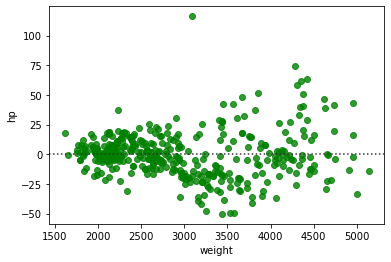

In [3]:
# Entre las ventajas que tiene seaborn está la posibilidad de graficar directamente los residuales

sns.residplot(x="weight", y="hp", data=df, color="green")
plt.show()

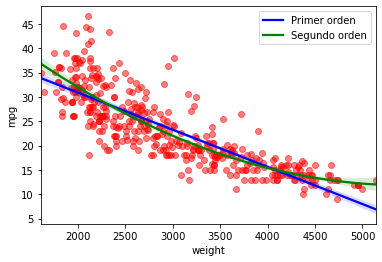

In [4]:
# Otra de las ventajas que se tiene es la posibilidad de incluir regresiones de mayor orden

plt.scatter(df["weight"], df["mpg"], color="red", alpha=0.5) # Grafico de dispersion
sns.regplot(x="weight", y="mpg", data=df, color="blue",scatter=None, label="Primer orden")  # Grafico de regresion de orden 1
sns.regplot(x="weight", y="mpg", data=df, color="green",scatter=None,                       
            order=2, label="Segundo orden")                                                 # Grafico de regresion de orden 2
plt.legend(loc="upper right")
plt.show()

En ocasiones resulta de interes poder comparar regresiones para diferentes grupos de variables, por loque seaborn con el argumento hue permite hacerlo de en un único gráfico o separados por columnas/filas

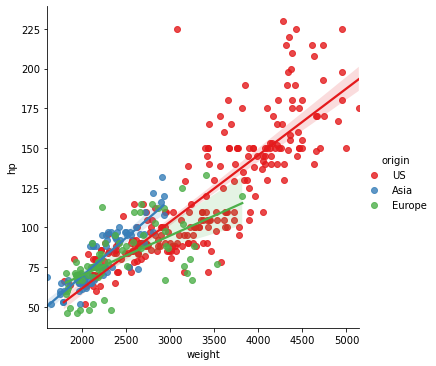

In [5]:
sns.lmplot(x="weight", y="hp", hue="origin", data=df, palette="Set1")
plt.show()

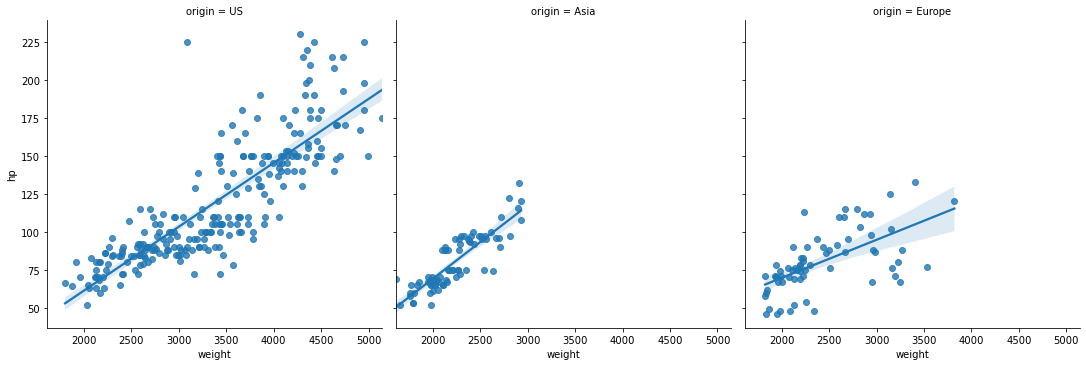

In [6]:
""""" Al igual que en el el gráfico anterior, es posible graficar por grupos, solo que ahora con el 
 argumento col/row se pueden hacer los gráficos separados ya sea por filas o columnas"""

sns.lmplot(x="weight", y="hp", col="origin", data=df, palette="Set1")
plt.show()

## Visualización de distribuciones univariantes<a class="anchor" id="Cap2"></a>

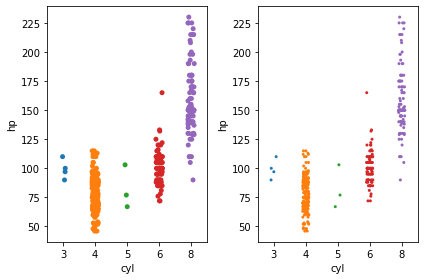

In [7]:
# Gráficos de tira (dispersión para una sola variable)

plt.subplot(1,2,1)
sns.stripplot(x="cyl", y="hp", data=df) # Variable categórica para diferenciar grupos

plt.subplot(1,2,2)
# Los argumentos size y jitter permiten una visualización más limpia y clara
sns.stripplot(x="cyl", y="hp", data=df, size=3, jitter=True) 
plt.tight_layout()
plt.show()

F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the marke

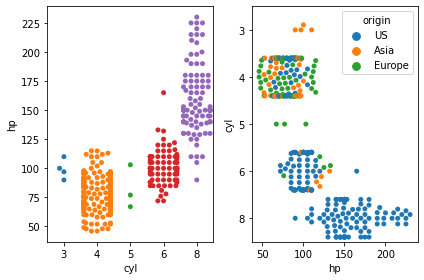

In [8]:
# Diagramas de enjambre

plt.subplot(1,2,1)
sns.swarmplot(x="cyl", y="hp", data=df)

plt.subplot(1,2,2)
sns.swarmplot(y="cyl", x="hp", data=df, hue="origin", orient="h")

plt.tight_layout()
plt.show()

Cuando los conjuntos de datos son sumamente gres puede no resultar beneficioso el uso de diagramas de dispersión o de enjambre, por lo que resulta preciso acudir a otras estrategias que resuman mejor el comportamiento de los datos como los diagramas de enjambre y los de violín (gráfico más sofisticado que el mismo diagrama de caja).

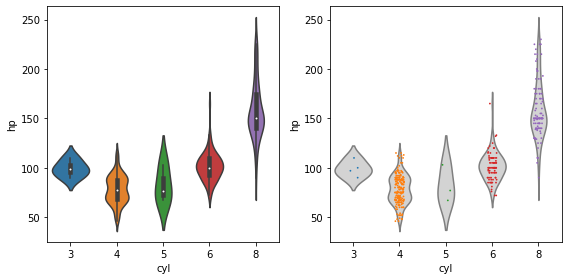

In [9]:
# Diagrama de violín 

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.violinplot(x="cyl", y="hp", data=df)

plt.subplot(1,2,2)
#Inner retira el diagrama de caja interno
sns.violinplot(x="cyl", y="hp", data=df, inner=None, color="lightgray") 
sns.stripplot(x="cyl", y="hp", data=df, size=1.8)

plt.tight_layout()
plt.show()

## Visualización de distribuciones univariantes<a class="anchor" id="Cap3"></a>

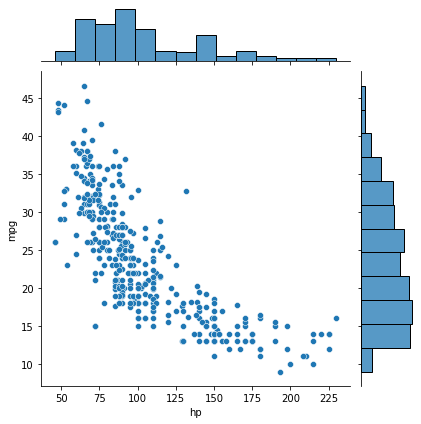

In [10]:
# En un inicio se presenta la visualización conjunta de histogramas y diagramas 
# de dispersión para un par de variable

sns.jointplot(x="hp", y="mpg", data=df)
plt.show()

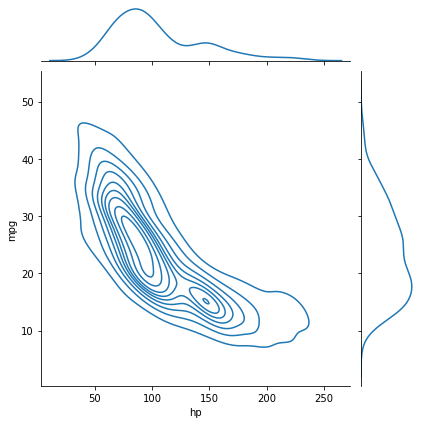

In [11]:
# Adicionalemente, el argumento kind permite representar diferente gráficas adicionales al diagrama
# de dispersión: "reg", "hex", "kde", "resid"

sns.jointplot(x="hp", y="mpg", data=df, kind="kde") # kde= kernel density estimate
plt.show()

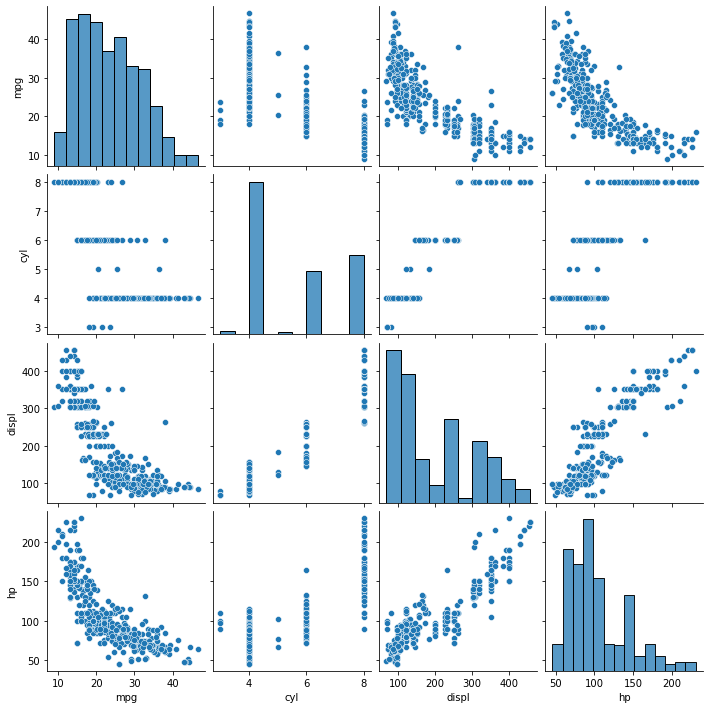

In [12]:
# En caso de haber más de dos variables continuas en un conjunto de datos es posible realizar una 
# cuadrícula de gráficas usando la función pairplot de seaborn

sns.pairplot(data=df[df.columns[:4]]) # Graficar los paraes para las cuatro primeras columnas
plt.show()

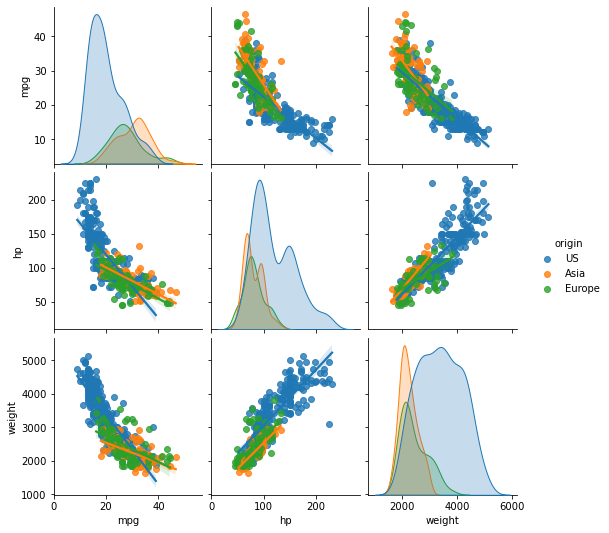

In [13]:
# Igualmente es posible trazar diferentes tipos de datos y agrupados por una determinada columna
# "variable categórica"

df_2 = df[["mpg", "hp", "origin", "weight"]]
sns.pairplot(data=df_2, hue="origin", kind="reg")
plt.show()

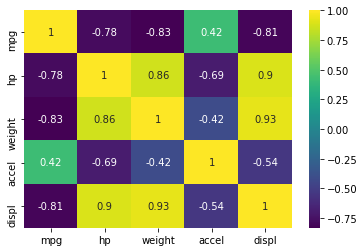

In [14]:
# Los mapas de calor representan la posibilidad de visualizar las correlaciones entre variables, su
# presentación es similar a los histogramas para dos variables continuas 

df_3 = df[["mpg", "hp", "weight", "accel", "displ"]]
corr_matrix = df_3.corr()  # Matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.show()

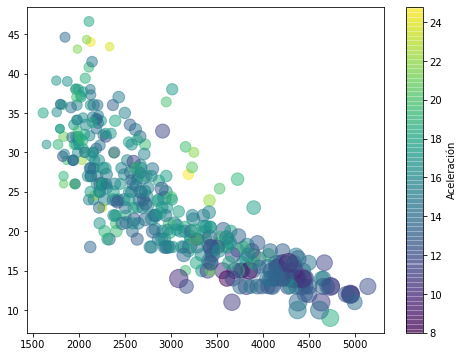

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df["weight"], df["mpg"], c=df["accel"], s=(df["hp"]*1.5), alpha=0.5)
plt.colorbar(label="Aceleración")
plt.show()